In [1]:
import Peptide_Chef as Chef
import math
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import functools
from functools import lru_cache
from pyteomics import parser, electrochem
import re
# from Peptide_Chef import Cook_Book

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.19.5.
The pandas version is 1.0.5.
The matplotlib version is 3.2.2.
The seaborn version is 0.11.0.


# In silico Digestion 

In [3]:
# use labelling format (below) to keep track of dfs.
##(*_dig= Digestion of Given Enzyme/Missed/Length/Charge)

In [4]:
url="https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz"

In [5]:
# Menu=Chef.CookBook(homebrew=False, takeout=True,url=url,measure=True, target="Peptide")

In [6]:
#if dataframe has been previous created, use this function. Otherwise, use CookBook function to convert Fasta to df. 
Menu=pd.read_excel(r'Human_Proteome.xlsx')

In [7]:
# Menu.to_excel('Human_Proteome.xlsx')

In [8]:
Menu.drop(Menu.columns[0], axis=1, inplace=True)


In [9]:
Menu.describe()

,Protein_Length
count,20614.000000
mean,552.845105
std,595.745883
min,2.000000
25%,245.000000
50%,410.000000
75%,666.000000
max,34350.000000


In [10]:
meat=Menu[["Peptide", "UniprotID"]].set_index("UniprotID").to_dict()["Peptide"]

In [11]:
%store meat

Stored 'meat' (dict)


## Trypsin in Silco Digestion

In [38]:
raws

{'Q9HC07',
 'Q04912',
 'Q9UGH3',
 'O75874',
 'O95832',
 'O95497',
 'Q9Y3Q3',
 'Q9UGV2',
 'Q07157',
 'O95490',
 'Q9ULT8',
 'P84243',
 'Q15645',
 'Q9Y295',
 'Q9C005',
 'Q96AG4',
 'P21283',
 'Q9BQE5',
 'Q96KG9',
 'Q8N2C7',
 'Q8N8Z6',
 'O15397',
 'P27352',
 'P10398',
 'P17931',
 'C9JI98',
 'P26012',
 'P36871',
 'P12004',
 'Q15155',
 'P18433',
 'A5YKK6',
 'P36639',
 'Q13162',
 'Q7LGA3',
 'Q14849',
 'P02774',
 'P19013',
 'Q02742',
 'O60462',
 'Q9P0K7',
 'Q96KP4',
 'Q6PKG0',
 'Q9BXR0',
 'Q9HCJ6',
 'Q16650',
 'Q9UNF1',
 'O43390',
 'P31350',
 'A6NMZ7',
 'P63104',
 'P05160',
 'O43688',
 'P16035',
 'Q8IXU6',
 'Q15465',
 'P30046',
 'Q7L5N1',
 'P23610',
 'Q9UGI8',
 'P04180',
 'Q8NI27',
 'Q8N307',
 'P48163',
 'P62750',
 'A5D8V6',
 'Q16643',
 'Q9BUF5',
 'Q9NZJ9',
 'Q9Y696',
 'Q14457',
 'P22102',
 'Q96EE3',
 'Q9NQR4',
 'Q9H4A6',
 'P62736',
 'P42224',
 'P98160',
 'Q8TCS8',
 'Q96K62',
 'Q9Y2V7',
 'P29323',
 'Q5JSH3',
 'Q9ULV4',
 'P36507',
 'Q08J23',
 'P49770',
 'P62906',
 'Q13618',
 'P23246',
 'Q9NYU2',

In [39]:
print(len(raws))
Menu=Menu.loc[Menu.UniprotID.isin(raws)]
Menu.describe()

3803


,Protein_Length
count,3796.000000
mean,661.019758
std,676.915124
min,44.000000
25%,290.000000
50%,475.000000
75%,792.250000
max,8384.000000


In [13]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3,4,5]
enzyme="trypsin"
Tryp_Peptides=[]
for site in missed_sites:
    x=f"Tryp_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    Tryp_Peptides.append(globals()[str(x)])
    

You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Generating trypsin-cut peptides based on 0-missed cleavages. 


KeyboardInterrupt: 

In [ ]:
Tryp_Peptides[0].sort_values("counts",ascending=True)

In [ ]:
Trypsin_Missed_Count=[]
Trypsin_Missed={}
i=0
for df in Tryp_Peptides: 
    Marked = set(df.gene)
    Total= set(Menu.UniprotID)
    unique= list(Marked ^ Total)
    x=len(unique)
    Trypsin_Missed_Count.append(x)
    Trypsin_Missed[i]=unique
    i=+1
Trypsin_Missed_Count

In [ ]:
List_Trypsin_Missed=["T_Missed_0","T_Missed_1","T_Missed_2","T_Missed_3"]
Unique_2_Trypsin=[]
for key,values in Trypsin_Missed.items():
    List_Trypsin_Missed[key] = Menu[Menu['UniprotID'].isin(values)]
    List_Trypsin_Missed[key].sort_values("UniprotID").reset_index(inplace=True)
    Unique_2_Trypsin.append(List_Trypsin_Missed[key])
Unique_2_Trypsin[0].head()

In [ ]:
x=Chef.ButcherShop(Unique_2_Trypsin[0],target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=-0.1,missed=0,exception=None,min_length=7,max_length=100)
x=Chef.Deli(x,meat_package=True)

In [ ]:
Chef.Marinate(x,"peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

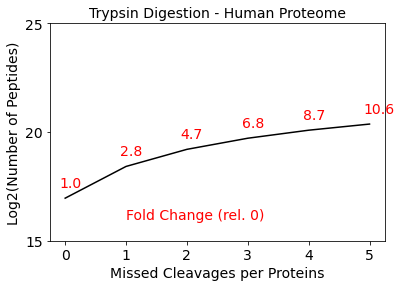

In [42]:
T_Pep_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    log = math.log2(len(df))
    T_Pep_Counts.append(log)
plt.plot(missed_sites,T_Pep_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(15, 26, 5),fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in T_Pep_Counts:
    ratio=2**(count-T_Pep_Counts[0])
    ratiox=float(round(ratio,1))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,T_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red",fontsize=14)
# plt.savefig("Trypsin_Silico_Peptides.eps",dpi=600)
plt.show()

In [12]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(T_Pro_Counts[0], T_Pro_Counts[-1]+2, 2),fontsize=14)
# plt.savefig("Trypsin_Silico_Protein_m0.eps",dpi=600,bbox_inches='tight')
plt.show()

NameError: name 'Tryp_Peptides' is not defined

In [ ]:
T_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    T_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig("Trypsin_Silico_Protein_m1.eps",dpi=600)
plt.show()

In [ ]:
columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3","Tryp_4","Tryp_5"]
Trypsin_Coverage=[]
Tryp_Silico_Coverage=pd.DataFrame()
df=Tryp_Peptides[0]
name=f"Cov_{columns[0]}" 
globals()[str(name)]={}
for gene, protein in raw.items():
    temp=tuple(df.loc[df.gene == gene]["peptide"])
    x=Chef.Pep2Pro(protein,temp)
    globals()[str(name)][gene]=x
temp=list(globals()[str(name)].values())
Tryp_Silico_Coverage[name]= np.array(temp)
print("Done")

In [ ]:
i=0
columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3","Tryp_4","Tryp_5"]
Trypsin_Coverage=[]
Tryp_Silico_Coverage=pd.DataFrame()
for df in Tryp_Peptides:
    name=f"Cov_{columns[i]}" 
    globals()[str(name)]={}
    for gene, protein in raw.items():
        temp=tuple(df.loc[df.gene == gene]["peptide"])
        x=Chef.Pep2Pro(protein,temp)
        globals()[str(name)][gene]=x
    temp=list(globals()[str(name)].values())
    Tryp_Silico_Coverage[name]= np.array(temp)
    i+=1
    print("Segment Complete...")
print("Collection Finished.")

Segment Complete...
Segment Complete...
Segment Complete...


In [ ]:
# Tryp_Silico_Coverage=pd.read_excel(r'Silico_Trypsin_Coverage_raw.xlsx')

In [ ]:
# Tryp_Silico_Coverage.to_excel('Silico_Trypsin_Coverage_raw.xlsx')

In [ ]:
Tryp_Silico_Coverage.head()


In [ ]:
Tryp_Silico_Coverage.drop(Tryp_Silico_Coverage.columns[0], axis=1, inplace=True)

In [ ]:
def Histogram(df,variables,labels,title, n_rows, n_cols):
    fig=plt.figure(figsize=(10,6),dpi=1200)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=15,ax=ax)
        ax.set_title(labels[i],fontsize=8)
#         fig.tight_layout()  # Improves appearance a bit.
        plt.yticks(np.arange(0,25000,5000),fontsize=10)
        plt.xticks(np.arange(0,1.1,0.1),fontsize=10)
        plt.ylim(0, 21000)    
#     plt.savefig(f"{title}.eps",dpi=300)
    plt.show()
    

In [ ]:
labels=["Missed_0","Missed_1","Missed_2","Missed_3"]
Histogram(Tryp_Silico_Coverage,Tryp_Silico_Coverage.columns,labels,"Trypsin_Histogram",2,2)

In [ ]:
df1 = Tryp_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Trypsin-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique')
# plt.savefig("Tryp_Coverage_KDE.eps",dpi=600)

## AspN in Silco Digestion

In [ ]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="asp-n"
AspN_Peptides=[]
for site in missed_sites:
    x=f"AspN_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    AspN_Peptides.append(globals()[str(x)])
    
    

In [ ]:
AspN_Peptides[0].sort_values("counts",ascending=True)

In [ ]:
AspN_Missed_Count=[]
AspN_Missed={}
i=0
for df in AspN_Peptides: 
    Marked = set(df.gene)
    Total= set(Menu.UniprotID)
    unique= list(Marked ^ Total)
    x=len(unique)
    AspN_Missed_Count.append(x)
    AspN_Missed[i]=unique
    i=+1
AspN_Missed_Count

In [ ]:
List_AspN_Missed=["A_Missed_0","A_Missed_1","A_Missed_2","A_Missed_3"]
Unique_2_AspN=[]
for key,values in AspN_Missed.items():
    List_AspN_Missed[key] = Menu[Menu['UniprotID'].isin(values)]
    List_AspN_Missed[key].sort_values("UniprotID").reset_index(inplace=True)
    Unique_2_AspN.append(List_AspN_Missed[key])
Unique_2_AspN[0].head()

In [ ]:
x=Chef.ButcherShop(Unique_2_AspN[0],target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=-0.1,missed=0,exception=None,min_length=7,max_length=100)
x=Chef.Deli(x,meat_package=True)

In [ ]:
x.sort_values("counts", axis=0, ascending=True)

In [ ]:
Chef.Marinate(x,"peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

In [ ]:
A_Pep_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    log = math.log2(len(df))
    A_Pep_Counts.append(log)
plt.plot(missed_sites,A_Pep_Counts,color="black")
plt.title('AspN Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(np.arange(missed_sites[0], missed_sites[-1]+1, 1),fontsize=14)
plt.yticks(np.arange(15, 26, 5),fontsize=14)
# plt.ylim([15, 25])
Ratios=[]
for count in A_Pep_Counts:
    ratio=2**(count-A_Pep_Counts[0])
    ratiox=float(round(ratio,1))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,A_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1.5,19,"Fold Change (rel. 0)",color="red",fontsize=14)
plt.savefig("AspN_Silico_Peptides.eps",dpi=600)
plt.show()

In [ ]:
A_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in AspN_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    A_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,A_Pro_Counts,color="black")
plt.title('AspN Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Proteins', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(A_Pro_Counts[0], A_Pro_Counts[-1]+1, 1),fontsize=14)
plt.savefig("AspN_Silico_Protein_m0.eps",dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
# i=0
# columns=["AspN_0","AspN_1","AspN_2","AspN_3",]
# AspN_Coverage=[]
# AspN_Silico_Coverage=pd.DataFrame()
# for df in AspN_Peptides:
#     name=f"Cov_{columns[i]}" 
#     globals()[str(name)]={}
#     for gene, protein in raw.items():
#         temp=tuple(df.loc[df.gene == gene]["peptide"])
#         x=Chef.Pep2Pro(protein,temp)
#         globals()[str(name)][gene]=x
#     temp=list(globals()[str(name)].values())
#     AspN_Silico_Coverage[name]= np.array(temp)
#     i+=1
#     print("Segment Complete...")
# print("Collection Finished.")

In [ ]:
AspN_Silico_Coverage=pd.read_excel(r'Silico_AspN_Coverage_raw.xlsx')
AspN_Silico_Coverage.drop(AspN_Silico_Coverage.columns[0], axis=1, inplace=True)

In [ ]:
# AspN_Silico_Coverage.to_excel('Silico_AspN_Coverage_raw.xlsx')

In [ ]:
labels=["Missed_0","Missed_1","Missed_2","Missed_3"]
Histogram(AspN_Silico_Coverage,AspN_Silico_Coverage.columns,labels,"AspN_Histogram",2,2)

In [ ]:
df1 = AspN_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('AspN-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique')
plt.savefig("AspN_Coverage_KDE.eps",dpi=600)

## GluC in Silco Digestion

In [ ]:
# GluC in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="glutamyl endopeptidase"
GluC_Peptides=[]
for site in missed_sites:
    x=f"GluC_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=1.55,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    GluC_Peptides.append(globals()[str(x)])
    
    

In [ ]:
GluC_Peptides[0].sort_values("counts",ascending=True)

In [ ]:
GluC_Missed_Count=[]
GluC_Missed={}
i=0
for df in GluC_Peptides: 
    Marked = set(df.gene)
    Total= set(Menu.UniprotID)
    unique= list(Marked ^ Total)
    x=len(unique)
    GluC_Missed_Count.append(x)
    GluC_Missed[i]=unique
    i=+1
GluC_Missed_Count

In [ ]:
List_GluC_Missed=["G_Missed_0","G_Missed_1","G_Missed_2","G_Missed_3"]
Unique_2_GluC=[]
for key,values in GluC_Missed.items():
    List_GluC_Missed[key] = Menu[Menu['UniprotID'].isin(values)]
    List_GluC_Missed[key].sort_values("UniprotID").reset_index(inplace=True)
    Unique_2_GluC.append(List_GluC_Missed[key])
Unique_2_GluC[0].head()

In [ ]:
x=Chef.ButcherShop(Unique_2_GluC[0],target="Peptide",identifier="UniprotID", rule=enzyme,min_charge=-0.1,missed=0,exception=None,min_length=7,max_length=100)
x=Chef.Deli(x,meat_package=True)

In [ ]:
x.sort_values("counts", axis=0, ascending=True)

In [ ]:
Chef.Marinate(x,"peptide",length=0,IPC=True,Hydro=True,GRAVY=True,NeutralZ=True,Peptide_Inspector=False)

In [ ]:
G_Pep_Counts=[]
#Count are in Log10
for df in GluC_Peptides:
    log = math.log2(len(df))
    G_Pep_Counts.append(log)
plt.plot(missed_sites,G_Pep_Counts,color="black")
plt.title('GluC Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(np.arange(missed_sites[0], missed_sites[-1]+1, 1),fontsize=14)
plt.yticks(np.arange(15, 26, 5),fontsize=14)
# plt.ylim([15, 25])
Ratios=[]
for count in G_Pep_Counts:
    ratio=2**(count-G_Pep_Counts[0])
    ratiox=float(round(ratio,1))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,G_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1.5,19,"Fold Change (rel. 0)",color="red",fontsize=14)
plt.savefig("GluC_Silico_Peptides.eps",dpi=600)
plt.show()

In [ ]:
G_Pro_Counts=[]
xx=[]
#Count are in Log10
for df in GluC_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",0)
    G_Pro_Counts.append(y)
    xx.append(x)
plt.plot(missed_sites,G_Pro_Counts,color="black")
plt.title('GluC Digestion - Human Proteome',fontsize=14)
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Proteins', fontsize=14)
plt.xticks(missed_sites,fontsize=14)
plt.yticks(np.arange(G_Pro_Counts[0], G_Pro_Counts[-1]+1, 1),fontsize=14)
plt.savefig("GluC_Silico_Protein_m0.eps",dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
# i=0
# columns=["GluC_0","GluC_1","GluC_2","GluC_3",]
# GluC_Coverage=[]
# GluC_Silico_Coverage=pd.DataFrame()
# for df in GluC_Peptides:
#     name=f"Cov_{columns[i]}" 
#     globals()[str(name)]={}
#     for gene, protein in raw.items():
#         temp=tuple(df.loc[df.gene == gene]["peptide"])
#         x=Chef.Pep2Pro(protein,temp)
#         globals()[str(name)][gene]=x
#     temp=list(globals()[str(name)].values())
#     GluC_Silico_Coverage[name]= np.array(temp)
#     i+=1
#     print("Segment Complete...")
# print("Collection Finished.")

In [ ]:
GluC_Silico_Coverage=pd.read_excel(r'Silico_GluC_Coverage_raw.xlsx')
GluC_Silico_Coverage.drop(GluC_Silico_Coverage.columns[0], axis=1, inplace=True)

In [ ]:
# GluC_Silico_Coverage.to_excel('Silico_GluC_Coverage_raw.xlsx')

In [ ]:
labels=["Missed_0","Missed_1","Missed_2","Missed_3"]
Histogram(GluC_Silico_Coverage,GluC_Silico_Coverage.columns,labels,"GluC_Histogram",2,2)

In [ ]:
df1 = GluC_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('GluC-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique')
plt.savefig("GluC_Coverage_KDE.eps",dpi=600)

# Raw Experimental Data